In [1]:
! pip install opencv-python

In [2]:
import cv2

In [3]:
IMG_DIMEN =224
N_Colors =3

In [4]:
# reading dataset
from tqdm import tqdm
import numpy as np
import os
def read_data (dir_path):
    X =[]
    y =[]
    y_map ={'NoDiabetes':0,'Mild':1,'Moderate':2,'Severe':3,'Proliferative DR':4}
    for class_name in y_map.keys():
        subdir_path = os.path.join(dir_path,class_name)
        filenames = os.listdir(subdir_path)
        for fname in tqdm(filenames):
            if fname.endswith('.jpeg'):
                img_path = os.path.join(subdir_path,fname)
                img = cv2.imread(img_path)
                img = cv2.resize(img, dsize=(IMG_DIMEN,IMG_DIMEN))
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                img = img.reshape((1,IMG_DIMEN,IMG_DIMEN,N_Colors))
                X.append(img)
                y.append(y_map[class_name])
    X = np.vstack(X).astype('float32')/255.0
    y = np.array(y).astype('int32')
        
    return X,y
    
    

In [5]:
X_train,y_train= read_data('dataset/train')

100%|██████████| 531/531 [00:10<00:00, 48.74it/s]


In [6]:
print(X_train.shape)
print(y_train.shape)

(3436, 224, 224, 3)
(3436,)


In [7]:
X_test,y_test = read_data('dataset/test')

100%|██████████| 71/71 [00:02<00:00, 23.70it/s]


In [8]:
print(X_test.shape)
print(y_test.shape)

(458, 224, 224, 3)
(458,)


In [9]:
X_val,y_val = read_data('dataset/validate')

100%|██████████| 106/106 [00:01<00:00, 59.48it/s]


In [10]:
print(X_val.shape)
print(y_val.shape)

(687, 224, 224, 3)
(687,)


In [ ]:
# visualizing an example image

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
def imshow(img):
    plt.figure(figsize=(6,6))
    if N_Colors ==3:
        plt.imshow(img)
    elif N_Colors ==1:
        plt.imshow(img , cmap='gray')
    plt.show()

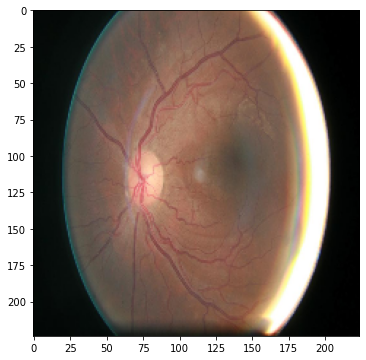

In [12]:
imshow(X_train[3])

In [13]:

from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_image_generator = ImageDataGenerator(rescale=1./255) 


val_image_generator = ImageDataGenerator(rescale=1./255)

In [14]:
batch_size = 32

In [15]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory='dataset/train',
                                                           shuffle=True,
                                                           target_size=(IMG_DIMEN,IMG_DIMEN),
                                                           class_mode='categorical')

val_data_gen = val_image_generator.flow_from_directory(batch_size=batch_size,
                                                       directory='dataset/validate',
                                                       target_size=(IMG_DIMEN,IMG_DIMEN),
                                                       class_mode='categorical')

Found 3436 images belonging to 5 classes.
Found 687 images belonging to 5 classes.


In [17]:
#BuildCNN


In [2]:

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D


          
           

In [17]:
IMG_DIMEN =224
N_Colors =3

In [18]:
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_DIMEN,IMG_DIMEN,N_Colors)),
    MaxPooling2D(),
    Dropout(0.2),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(5, activation='softmax')
])

In [19]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
epochs = 90

In [26]:
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=len(train_data_gen),
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=len(val_data_gen)
)

C:\Users\DELL\AppData\Local\Temp\ipykernel_13712\3535287338.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/90
108/108 [==============================] - 123s 1s/step - loss: 1.8346 - accuracy: 0.2200 - val_loss: 1.6027 - val_accuracy: 0.2183
Epoch 2/90
108/108 [==============================] - 110s 1s/step - loss: 1.5926 - accuracy: 0.2340 - val_loss: 1.5845 - val_accuracy: 0.2547
Epoch 3/90
108/108 [==============================] - 110s 1s/step - loss: 1.5796 - accuracy: 0.2707 - val_loss: 1.5757 - val_accuracy: 0.2620
Epoch 4/90
108/108 [==============================] - 110s 1s/step - loss: 1.5718 - accuracy: 0.2742 - val_loss: 1.5613 - val_accuracy: 0.2751
Epoch 5/90
108/108 [==============================] - 110s 1s/step - loss: 1.5610 - accuracy: 0.2835 - val_loss: 1.5531 - val_accuracy: 0.2751
Epoch 6/90
108/108 [==============================] - 112s 1s/step - loss: 1.5474 - accuracy: 0.2937 - val_loss: 1.5519 - val_accuracy: 0.2940
Epoch 7/90
108/108 [==============================] - 113s 1s/step - loss: 1.5355 - accuracy: 0.3068 - val_loss: 1.5380 - val_accuracy: 0.3173

Epoch 58/90
108/108 [==============================] - 107s 985ms/step - loss: 0.0470 - accuracy: 0.9837 - val_loss: 1.7803 - val_accuracy: 0.7555
Epoch 59/90
108/108 [==============================] - 107s 991ms/step - loss: 0.0620 - accuracy: 0.9852 - val_loss: 1.7294 - val_accuracy: 0.7525
Epoch 60/90
108/108 [==============================] - 106s 984ms/step - loss: 0.0320 - accuracy: 0.9913 - val_loss: 1.7180 - val_accuracy: 0.7686
Epoch 61/90
108/108 [==============================] - 106s 981ms/step - loss: 0.0488 - accuracy: 0.9846 - val_loss: 1.7333 - val_accuracy: 0.7598
Epoch 62/90
108/108 [==============================] - 109s 1s/step - loss: 0.0628 - accuracy: 0.9811 - val_loss: 1.8570 - val_accuracy: 0.7627
Epoch 63/90
108/108 [==============================] - 107s 992ms/step - loss: 0.0605 - accuracy: 0.9843 - val_loss: 1.5201 - val_accuracy: 0.7744
Epoch 64/90
108/108 [==============================] - 108s 996ms/step - loss: 0.0511 - accuracy: 0.9875 - val_loss: 1.87

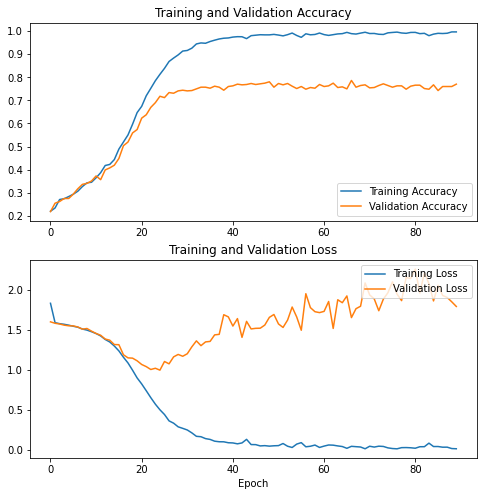

In [28]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.show()

In [31]:
test_image_generator = ImageDataGenerator(rescale=1./255)
test_data_gen = test_image_generator.flow_from_directory(batch_size=batch_size,
                                                         directory='dataset/test',
                                                         target_size=(IMG_DIMEN,IMG_DIMEN),
                                                         class_mode='categorical')

test_loss, test_acc = model.evaluate_generator(test_data_gen, steps=len(test_data_gen))
print('Test Accuracy:', test_acc)

Found 458 images belonging to 5 classes.


C:\Users\DELL\AppData\Local\Temp\ipykernel_13712\2776790697.py:7: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  test_loss, test_acc = model.evaluate_generator(test_data_gen, steps=len(test_data_gen))


Test Accuracy: 0.7641921639442444


In [20]:
model.save('cnnmodel.h5')

In [21]:
model.load_weights('cnnmodel.h5')

In [9]:
#Load and preprocess the image
classes = ['No Diabetes', 'Mild', 'Moderate', 'severe', 'Proliferative DR']
model = tf.keras.models.load_model('C:\\Users\\DELL\\notebooks\\Notebooks\\diabetic\\cnnmodel.h5')
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input
img_path = 'C:\\Users\\DELL\\notebooks\\Notebooks\\diabetic\\dataset\\test\\Mild\\30_left.jpeg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = tf.keras.applications.mobilenet_v2.preprocess_input(x)
predictions = model.predict(x)
idx = np.argmax(predictions)
# print(classes[idx])
predictions = classes[idx]
print(predictions) 

1/1 [==============================] - 0s 348ms/step
Mild
